In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf
from src.nnetwork import model as md
import pandas as pd
from sklearn.metrics import mean_squared_error

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

data_folder = "C:\\Dev\\Smart Car Project\\Dataset-prep\\"

nv_path = data_folder + "nvidia\\"
nv_bl2_path = data_folder + "nvidia-blur2\\"
nv_bl4_path = data_folder + "nvidia-blur4\\"
nv_bl8_path = data_folder + "nvidia-blur8\\"

sm_path = data_folder + "self-made\\"
sm_bl2_path = data_folder + "self-made-blur2\\"
sm_bl4_path = data_folder + "self-made-blur4\\"
sm_bl8_path = data_folder + "self-made-blur8\\"

nv_paths = [nv_path, nv_bl2_path, nv_bl4_path, nv_bl8_path]
sm_paths = [sm_path, sm_bl2_path, sm_bl4_path, sm_bl8_path]

paths = nv_paths + sm_paths

c:\program files\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
from src.nnetwork.model import load_data

train_gens = {}
valid_gens = {}

for path in nv_paths:
    train_gens[path], valid_gens[path] = load_data("output-aug.csv", path, pre_shuffle=True, batch_size=64, seed=41,
                                                   target_size=(256, 455))

for path in sm_paths:
    train_gens[path], valid_gens[path] = load_data("output-aug.csv", path, pre_shuffle=True, batch_size=64, seed=41)

Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 72650 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.


In [7]:
sm_model = md.compile_model(md.model_jnet(0, 96, 0, 0, (240, 320, 3)), lr=1e-3)
md.fit_model(sm_model, train_gens[sm_path], valid_gens[sm_path], sm_path + "JNET-new-b64-s41-lr3-e70", epochs=70,
             max_queue_size=32, workers=8)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_4 (Cropping2D)    (None, 144, 320, 3)       0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 144, 320, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 140, 316, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 70, 158, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 66, 154, 32)       12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 33, 77, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 73, 64)       

In [9]:
nv_model = md.compile_model(md.model_jnet(130, 0, 128, 0, (256, 455, 3)), lr=1e-3)
md.fit_model(nv_model, train_gens[nv_path], valid_gens[nv_path], nv_path + "JNET-new-b64-s41-lr3-e70", epochs=70,
             max_queue_size=32, workers=8)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_5 (Cropping2D)    (None, 126, 327, 3)       0         
_________________________________________________________________
lambda_5 (Lambda)            (None, 126, 327, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 122, 323, 16)      1216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 161, 16)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 57, 157, 32)       12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 78, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 74, 64)       

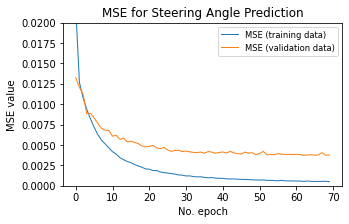

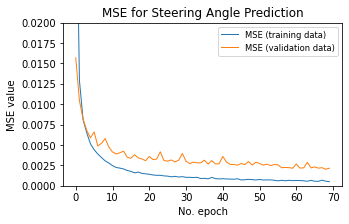

In [9]:
# RESULTS GRAPH NO. 1 - NEW
sm_hist = md.load_history(sm_path + "JNET-new-b64-s41-lr3-e70", "history.csv")
md.plot_history(sm_hist, sm_path + "JNET-new-b64-s41-lr3-e70", out_filename="No 1a - Training Graph My Dataset.png", ylim=0.02)

nv_hist = md.load_history(nv_path + "JNET-new-b64-s41-lr3-e70", "history.csv")
md.plot_history(nv_hist, nv_path + "JNET-new-b64-s41-lr3-e70", out_filename="No 1b - Training Graph Public Dataset.png", ylim=0.02)

Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.


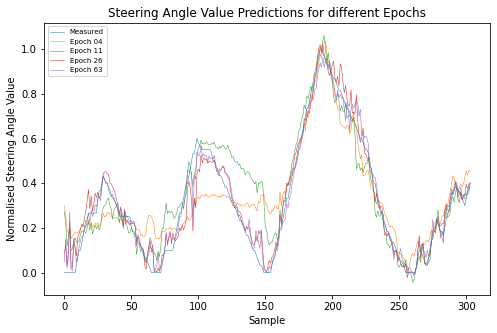

In [2]:
# RESULTS GRAPH NO. 2 - NEW
model_names = ["model-004-0.009", "model-011-0.006", "model-026-0.004", "model-063-0.004"]
plot_labels = ["Epoch 04", "Epoch 11", "Epoch 26", "Epoch 63"]
preds_list = [None] * len(model_names)
labels = []

for index, name in enumerate(model_names):
    temp_model = md.load_model(sm_path + "JNET-new-b64-s41-lr3-e70", name)
    preds_list[index], labels, _ = md.get_predictions(temp_model, sm_path, "output-aug.csv", (240, 320), percentage=0.005, seed=40)

md.plot_predictions(preds_list, plot_labels, labels, sm_path + "JNET-new-b64-s41-lr3-e70", "No 2 - Different Epochs.png",
                    linewidth=0.5, fontsize="x-small", title='Steering Angle Value Predictions for different Epochs',
                    figsize=(8, 5))

Found 1216 non-validated image filenames.


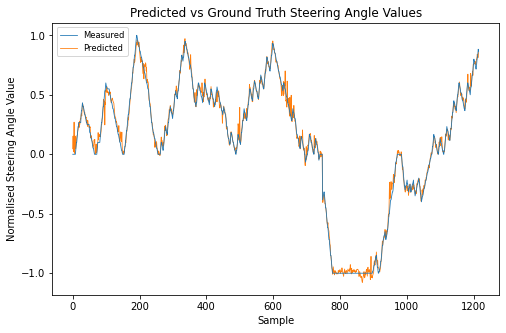

In [8]:
# RESULTS GRAPH NO. 3 - NEW
sm_model = md.load_model(sm_path + "JNET-new-b64-s41-lr3-e70", "model-063-0.004")
preds, labels, _ = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.02)
md.plot_predictions(preds, 'Predicted', labels, sm_path + "JNET-new-b64-s41-lr3-e70", "No 3 - Baseline Results.png",
                    linewidth=0.8, figsize=(8, 5))

Found 1207 non-validated image filenames.


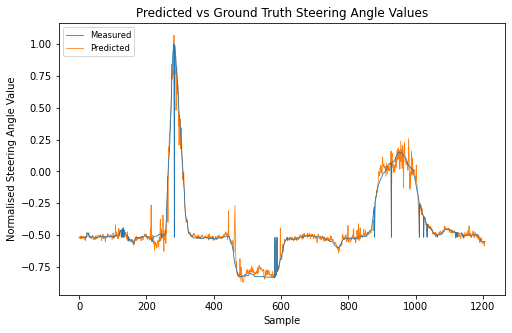

In [11]:
# RESULTS GRAPH NO. 4 - NEW
nv_model = md.load_model(nv_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.002")
preds, labels, _ = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.0133)
md.plot_predictions(preds, 'Predicted', labels, nv_path + "JNET-new-b64-s41-lr3-e70", "No 4 - Real-World Results.png",
                    linewidth=0.8, figsize=(8, 5))

In [10]:
# RESULTS GRAPH NO. 5a - NEW
sm_model = md.load_model(sm_path + "JNET-new-b64-s41-lr3-e70", "model-063-0.004")
preds_1, labels, _ = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_2, _, _ = md.get_predictions(sm_model, sm_bl2_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_3, _, _ = md.get_predictions(sm_model, sm_bl4_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)
preds_4, _, _ = md.get_predictions(sm_model, sm_bl8_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)

preds_list = [preds_1, preds_2, preds_3, preds_4]
plot_labels = ["Clear", "Blurred [σ = 2]", "Blurred [σ = 4]", "Blurred [σ = 8]"]

md.plot_predictions(preds_list, plot_labels, labels, sm_path + "JNET-new-b64-s41-lr3-e70",
                    "No 5a - Blurred Baseline Graph.png", linewidth=0.5, fontsize="small",
                    title="Steering Angle Predictions for differently blurred Datasets", figsize=(8, 5))

Found 12168 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 12168 non-validated image filenames.
[0.0019736756588754996, 0.06207104709399734, 0.14271172115577369, 0.2032176370289595]


In [ ]:
sm_model = md.load_model(sm_path + "JNET-new-b64-s41-lr3-e70", "model-063-0.004")
preds_1, labels, _ = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.2)
preds_2, _, _ = md.get_predictions(sm_model, sm_bl2_path, "output-aug.csv", (240, 320), seed=40, percentage=0.2)
preds_3, _, _ = md.get_predictions(sm_model, sm_bl4_path, "output-aug.csv", (240, 320), seed=40, percentage=0.2)
preds_4, _, _ = md.get_predictions(sm_model, sm_bl8_path, "output-aug.csv", (240, 320), seed=40, percentage=0.2)

preds_list = [preds_1, preds_2, preds_3, preds_4]

print([mean_squared_error(labels, preds) for preds in preds_list])

In [11]:
# RESULTS GRAPH NO. 5b - NEW
nv_model = md.load_model(nv_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.002")
preds_1, labels, _ = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.2)
preds_2, _, _ = md.get_predictions(nv_model, nv_bl2_path, "output-aug.csv", (256, 455), seed=40, percentage=0.2)
preds_3, _, _ = md.get_predictions(nv_model, nv_bl4_path, "output-aug.csv", (256, 455), seed=40, percentage=0.2)
preds_4, _, _ = md.get_predictions(nv_model, nv_bl8_path, "output-aug.csv", (256, 455), seed=40, percentage=0.2)

preds_list = [preds_1, preds_2, preds_3, preds_4]
plot_labels = ["Clear", "Blurred [σ = 2]", "Blurred [σ = 4]", "Blurred [σ = 8]"]

# md.plot_predictions(preds_list, plot_labels, labels, nv_path + "JNET-new-b64-s41-lr3-e70",
#                     "No 5b - Blurred Real-World Graph.png", linewidth=0.5, fontsize="small",
#                     title="Steering Angle Predictions for differently blurred Datasets", figsize=(8, 5))

print([mean_squared_error(labels, preds) for preds in preds_list])

Found 18162 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 18162 non-validated image filenames.
[0.0005705755910479578, 0.09435304595072813, 0.4079486880939451, 0.5792389011374799]


Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.
Found 6084 non-validated image filenames.


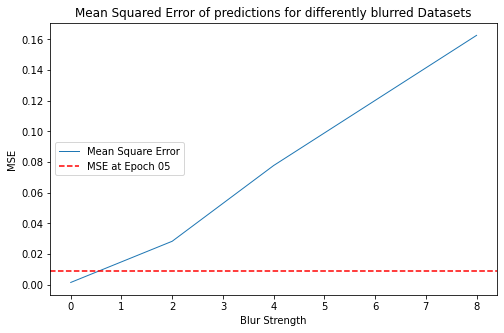

In [2]:
# RESULTS GRAPH NO. 6a
sm_model = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-067-0.003")
preds_1, labels, _ = md.get_predictions(sm_model, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_2, _, _ = md.get_predictions(sm_model, sm_bl2_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_3, _, _ = md.get_predictions(sm_model, sm_bl4_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)
preds_4, _, _ = md.get_predictions(sm_model, sm_bl8_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)

preds_list = [preds_1, preds_2, preds_3, preds_4]
x_values = [0, 2, 4, 8]

sm_model_extra = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-005-0.010")
preds_extra, _ = md.get_predictions(sm_model_extra, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.1)

md.plot_mse(preds_list, labels, x_values, preds_extra, 'MSE at Epoch 05', sm_path + "JNET-b64-s41-lr3-e70", figsize=(8, 5),
            fontsize="medium", title="Mean Squared Error of predictions for differently blurred Datasets")

Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.
Found 9081 non-validated image filenames.


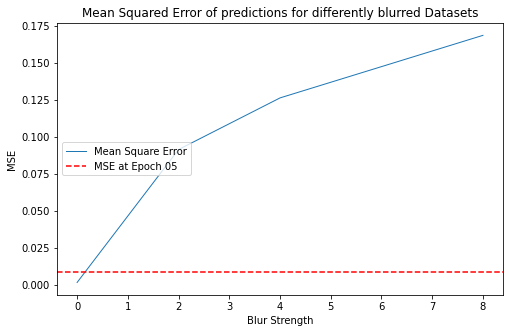

In [3]:
# RESULTS GRAPH NO. 6b
nv_model = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-033-0.001")
preds_1, labels, _ = md.get_predictions(nv_model, nv_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_2, _, _ = md.get_predictions(nv_model, nv_bl2_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_3, _, _ = md.get_predictions(nv_model, nv_bl4_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)
preds_4, _, _ = md.get_predictions(nv_model, nv_bl8_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)

preds_list = [preds_1, preds_2, preds_3, preds_4]
x_values = [0, 2, 4, 8]

nv_model_extra = md.load_model(nv_path + "JNET-b64-s42-lr3-e0_33c", "model-005-0.010")
preds_extra, _, _ = md.get_predictions(nv_model_extra, nv_path, "output-aug.csv", (256, 455), seed=39, percentage=0.1)

md.plot_mse(preds_list, labels, x_values, preds_extra, 'MSE at Epoch 05', nv_path + "JNET-b64-s42-lr3-e0_33c", figsize=(8, 5),
            fontsize="medium", title="Mean Squared Error of predictions for differently blurred Datasets")

In [5]:
# ABLATION STUDY INVESTIGATING PRE-SHUFFLING
from src.nnetwork.model import load_data

abl_configuration = {"+Pre_+Norm": (True, True),
                     "-Pre_+Norm": (False, True),
                     "+Pre_-Norm": (True, False),
                     "-Pre_-Norm": (False, False)}
abl_train_gens = {}
abl_valid_gens = {}

for key, val in abl_configuration.items():
    abl_train_gens[key], abl_valid_gens[key] = load_data("output-aug.csv", sm_path, pre_shuffle=val[0], batch_size=64,
                                                   seed=34, target_size=(240, 320), shuffle=val[1])

Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.


In [3]:
for key in abl_configuration:
    model = md.compile_model(md.model_jnet(0, 96, 0, 0, (240, 320, 3)), lr=1e-3)

    md.fit_model(model, abl_train_gens[key], abl_valid_gens[key], sm_path + "JNET-new-b64-s33-lr3-e20-" + key, epochs=20,
             max_queue_size=32, workers=8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 144, 320, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 144, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 140, 316, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 70, 158, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 154, 32)       12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 77, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 73, 64)        5

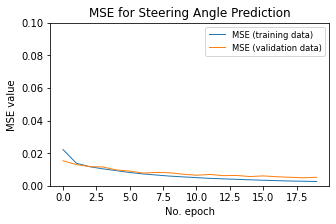

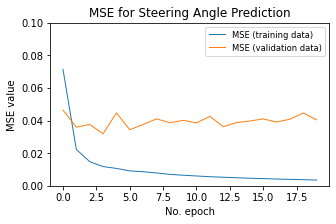

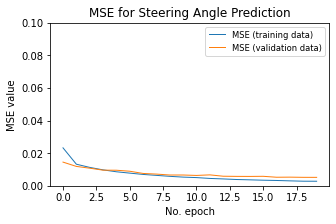

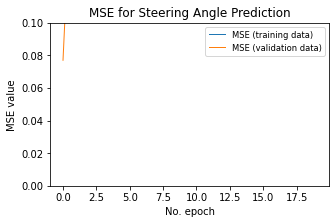

In [6]:
for key in abl_configuration:
    hist = md.load_history(sm_path + "JNET-new-b64-s33-lr3-e20-" + key, "history.csv")
    md.plot_history(hist, sm_path + "JNET-new-b64-s33-lr3-e20-" + key, ylim=0.1)

In [6]:
# PREDICTION ERROR SCENARIO INVESTIAGION - SELF-MADE DATASET
sm_model_full = md.load_model(sm_path + "JNET-b64-s41-lr3-e70", "model-067-0.003")
sm_full_preds, sm_full_labels, sm_full_files = md.get_predictions(sm_model_full, sm_path, "output-aug.csv", (240, 320),
                                                                  seed=38, percentage=0.99999)

df = pd.DataFrame(list(zip(sm_full_files, sm_full_labels, sm_full_preds)), columns=['Filename', 'Angle', 'Prediction'])
df.to_csv(sm_path + "JNET-b64-s41-lr3-e70\\predictions.csv", index=False)

Found 60840 non-validated image filenames.


In [3]:
# PREDICTION ERROR SCENARIO INVESTIGATION - NVIDIA DATASET
nv_model_full = md.load_model(nv_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.002")
nv_full_preds, nv_full_labels, nv_full_files = md.get_predictions(nv_model_full, nv_path, "output-aug.csv", (256, 455),
                                                                  seed=38, percentage=0.99999)

df = pd.DataFrame(list(zip(nv_full_files, nv_full_labels, nv_full_preds)), columns=['Filename', 'Angle', 'Prediction'])
df.to_csv(nv_path + "JNET-new-b64-s41-lr3-e70\\predictions.csv", index=False)

Found 90811 non-validated image filenames.


In [3]:
# BLURRED MODEL TRAINING
sm_model_b2 = md.compile_model(md.model_jnet(0, 96, 0, 0, (240, 320, 3)), lr=1e-3)
md.fit_model(sm_model_b2, train_gens[sm_bl2_path], valid_gens[sm_bl2_path], sm_bl2_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

sm_model_b4 = md.compile_model(md.model_jnet(0, 96, 0, 0, (240, 320, 3)), lr=1e-3)
md.fit_model(sm_model_b4, train_gens[sm_bl4_path], valid_gens[sm_bl4_path], sm_bl4_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

sm_model_b8 = md.compile_model(md.model_jnet(0, 96, 0, 0, (240, 320, 3)), lr=1e-3)
md.fit_model(sm_model_b8, train_gens[sm_bl8_path], valid_gens[sm_bl8_path], sm_bl8_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 144, 320, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 144, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 140, 316, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 70, 158, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 154, 32)       12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 77, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 73, 64)        5

In [7]:
nv_model_b2 = md.compile_model(md.model_jnet(130, 0, 128, 0, (256, 455, 3)), lr=1e-3)
md.fit_model(nv_model_b2, train_gens[nv_bl2_path], valid_gens[nv_bl2_path], nv_bl2_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

nv_model_b4 = md.compile_model(md.model_jnet(130, 0, 128, 0, (256, 455, 3)), lr=1e-3)
md.fit_model(nv_model_b4, train_gens[nv_bl4_path], valid_gens[nv_bl4_path], nv_bl4_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

nv_model_b8 = md.compile_model(md.model_jnet(130, 0, 128, 0, (256, 455, 3)), lr=1e-3)
md.fit_model(nv_model_b8, train_gens[nv_bl8_path], valid_gens[nv_bl8_path], nv_bl8_path + "JNET-new-b64-s41-lr3-e70",
             epochs=70, max_queue_size=32, workers=8)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_4 (Cropping2D)    (None, 126, 327, 3)       0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 126, 327, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 122, 323, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 61, 161, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 57, 157, 32)       12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 78, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 74, 64)       

Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.


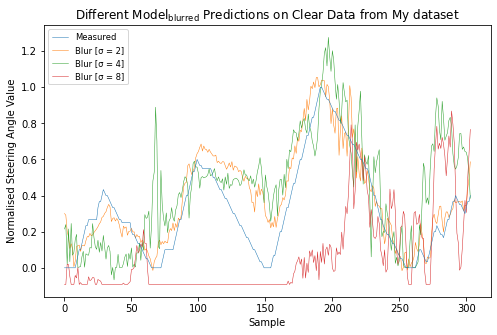

In [12]:
# RESULTS GRAPH NO. 7a - NEW
sm_model_b2 = md.load_model(sm_bl2_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.003")
sm_model_b4 = md.load_model(sm_bl4_path + "JNET-new-b64-s41-lr3-e70", "model-065-0.003")
sm_model_b8 = md.load_model(sm_bl8_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.003")

plot_labels = ["Blur [σ = 2]", "Blur [σ = 4]", "Blur [σ = 8]"]
preds_list = [None] * 4

for idx, mod in enumerate([sm_model_b2, sm_model_b4, sm_model_b8]):
    preds_list[idx], labels, _ = md.get_predictions(mod, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.005)

md.plot_predictions(preds_list, plot_labels, labels, sm_path + "JNET-new-b64-s41-lr3-e70",
                    "No 7a - Model{blur} on Clear Data from My Dataset.png", linewidth=0.5, fontsize="small",
                    title="Different $\mathregular{Model_{blurred}}$ Predictions on Clear Data from My dataset", figsize=(8, 5))

In [15]:
sm_model_b2 = md.load_model(sm_bl2_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.003")
sm_model_b4 = md.load_model(sm_bl4_path + "JNET-new-b64-s41-lr3-e70", "model-065-0.003")
sm_model_b8 = md.load_model(sm_bl8_path + "JNET-new-b64-s41-lr3-e70", "model-069-0.003")

preds_list = [None] * 3

for idx, mod in enumerate([sm_model_b2, sm_model_b4, sm_model_b8]):
    preds_list[idx], labels, _ = md.get_predictions(mod, sm_path, "output-aug.csv", (240, 320), seed=40, percentage=0.2)

print([mean_squared_error(labels, preds) for preds in preds_list])

Found 12168 non-validated image filenames.
Found 12168 non-validated image filenames.
Found 12168 non-validated image filenames.
[0.01504473297751749, 0.06045730675902024, 0.1390365625830153]


Found 454 non-validated image filenames.
Found 454 non-validated image filenames.
Found 454 non-validated image filenames.


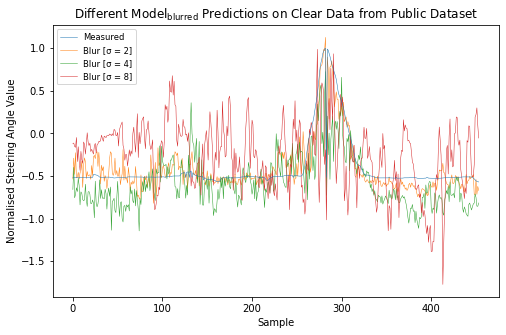

In [13]:
# RESULTS GRAPH NO. 7b - NEW
nv_model_b2 = md.load_model(nv_bl2_path + "JNET-new-b64-s41-lr3-e70", "model-057-0.002")
nv_model_b4 = md.load_model(nv_bl4_path + "JNET-new-b64-s41-lr3-e70", "model-055-0.003")
nv_model_b8 = md.load_model(nv_bl8_path + "JNET-new-b64-s41-lr3-e70", "model-054-0.003")

plot_labels = ["Blur [σ = 2]", "Blur [σ = 4]", "Blur [σ = 8]"]
preds_list = [None] * 4

for idx, mod in enumerate([nv_model_b2, nv_model_b4, nv_model_b8]):
    preds_list[idx], labels, _ = md.get_predictions(mod, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.005)

md.plot_predictions(preds_list, plot_labels, labels, nv_path + "JNET-new-b64-s41-lr3-e70",
                    "No 7b - Model{blur} on Clear Data from Public Dataset.png", linewidth=0.5, fontsize="small",
                    title="Different $\mathregular{Model_{blurred}}$ Predictions on Clear Data from Public Dataset", figsize=(8, 5))

In [4]:
nv_model_b2 = md.load_model(nv_bl2_path + "JNET-new-b64-s41-lr3-e70", "model-057-0.002")
nv_model_b4 = md.load_model(nv_bl4_path + "JNET-new-b64-s41-lr3-e70", "model-055-0.003")
nv_model_b8 = md.load_model(nv_bl8_path + "JNET-new-b64-s41-lr3-e70", "model-054-0.003")

preds_list = [None] * 3

for idx, mod in enumerate([nv_model_b2, nv_model_b4, nv_model_b8]):
    preds_list[idx], labels, _ = md.get_predictions(mod, nv_path, "output-aug.csv", (256, 455), seed=40, percentage=0.2)

print([mean_squared_error(labels, preds) for preds in preds_list])

Found 18162 non-validated image filenames.
Found 18162 non-validated image filenames.
Found 18162 non-validated image filenames.
[0.010391809401840762, 0.06519383637497339, 0.13094153945251352]


In [2]:
md.convert_to_tflite(sm_path + "JNET-new-b64-s41-lr3-e70", "model-063-0.004")

INFO:tensorflow:Assets written to: C:\Users\MARCSC~1\AppData\Local\Temp\tmp78cxv3y3\assets
